In [40]:
%%bash
pip install xgboost
pip install lightgbm
pip install mlxtend
pip install graphviz

In [41]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import max_error
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from mlxtend.regressor import StackingCVRegressor
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import uniform, randint
import xgboost
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import graphviz
import warnings
warnings.filterwarnings('ignore')

In [42]:
%store -r x_train_prepared
%store -r x_test_prepared
%store -r y_train
%store -r y_test


In [43]:
pca = PCA()
pca.fit(x_train_prepared)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
print(pca.n_components_)

80


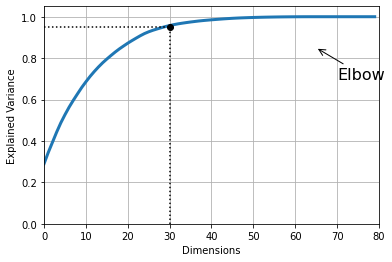

In [44]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 80, 0, 1.05])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
plt.show()

In [45]:
pca = PCA(n_components=0.95)
x_reduced = pca.fit_transform(x_train_prepared)
x_test_reduced = pca.transform(x_test_prepared)
print(len(x_test_prepared))

20


In [46]:
lin_reg = LinearRegression()
lin_reg.fit(x_reduced, y_train)
y_pred = lin_reg.predict(x_test_reduced)
print(np.sqrt(mean_squared_error(y_test,y_pred)))
print(max_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

52.26443584151022
102.17809485110261
0.45316127813696494


In [58]:
ridge_reg = Ridge()
ridge_reg.fit(x_train_prepared, y_train)
y_pred = ridge_reg.predict(x_test_prepared)
print(np.sqrt(mean_squared_error(y_test,y_pred)))
print(max_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

62.515120744298805
145.70092899003188
0.21762155925158966


In [59]:
lasso_reg = Lasso()
lasso_reg.fit(x_train_prepared, y_train)
y_pred = lasso_reg.predict(x_test_prepared)
print(np.sqrt(mean_squared_error(y_test,y_pred)))
print(max_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

38.70818975466528
96.95906876368696
0.7000475258192909


In [60]:
enet_reg = ElasticNet()
enet_reg.fit(x_train_prepared, y_train)
y_pred = enet_reg.predict(x_test_prepared)
print(np.sqrt(mean_squared_error(y_test,y_pred)))
print(max_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

48.64319666820108
100.7999949922011
0.5263135725915586


In [47]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train_prepared, y_train)
y_pred = tree_reg.predict(x_test_prepared)
print(np.sqrt(mean_squared_error(y_test,y_pred)))
print(max_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

54.49809443329604
104.89634899999999
0.405421282268844


In [48]:
forest_reg = RandomForestRegressor()
forest_reg.fit(x_train_prepared, y_train)
y_pred = forest_reg.predict(x_test_prepared)

print(np.sqrt(mean_squared_error(y_test,y_pred)))
print(max_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

37.64909141322404
79.28249871999995
0.7162370270814428


In [49]:
bag_reg = BaggingRegressor()
bag_reg.fit(x_train_prepared, y_train)
y_pred = bag_reg.predict(x_test_prepared)

print(np.sqrt(mean_squared_error(y_test,y_pred)))
print(max_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

37.78554927666947
82.22732210000001
0.7141763206855156


In [50]:
ada_reg = AdaBoostRegressor()
ada_reg.fit(x_train_prepared, y_train)
y_pred = ada_reg.predict(x_test_prepared)

print(np.sqrt(mean_squared_error(y_test,y_pred)))
print(max_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

40.54155138872962
98.65243725
0.670960941994577


In [51]:
gbr_reg = GradientBoostingRegressor(n_estimators=3000,
                                    learning_rate=0.05, max_depth=4, max_features='sqrt',
                                    min_samples_leaf=15, min_samples_split=10, loss='huber', random_state =42)
gbr_reg.fit(x_train_prepared, y_train)
y_pred = gbr_reg.predict(x_test_prepared)

print(np.sqrt(mean_squared_error(y_test,y_pred)))
print(max_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

52.10778490832393
118.89938835502983
0.45643441855027234


In [52]:
lgbm_reg = LGBMRegressor(objective='regression', 
                                       num_leaves=4,
                                       learning_rate=0.01, 
                                       n_estimators=5000,
                                       max_bin=200, 
                                       bagging_fraction=0.75,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       feature_fraction=0.2,
                                       feature_fraction_seed=7,
                                       verbose=-1,
                                       )
lgbm_reg.fit(x_train_prepared, y_train)
y_pred = lgbm_reg.predict(x_test_prepared)

print(np.sqrt(mean_squared_error(y_test,y_pred)))
print(max_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
58.77364112867641
111.12899426500013
0.30846857633683933


[15:21:41] WARNING: ../src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
35.041868259991624
79.56207328222655
0.7541777264910765


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

<Figure size 1440x432 with 0 Axes>

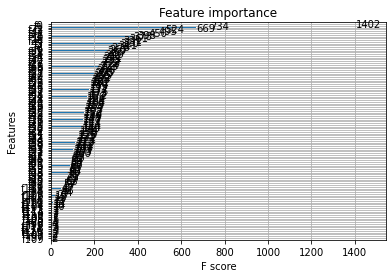

In [53]:
xgb_reg = XGBRegressor(learning_rate=0.01,n_estimators=3460,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006)
xgb_reg.fit(x_train_prepared, y_train)
y_pred = xgb_reg.predict(x_test_prepared)

print(np.sqrt(mean_squared_error(y_test,y_pred)))
print(max_error(y_test,y_pred))
print(r2_score(y_test,y_pred))
plt.figure(figsize=(20, 6))
xgboost.plot_importance(xgb_reg)


In [64]:
regressors=(gbr_reg, forest_reg, ada_reg,bag_reg, xgb_reg, lgbm_reg,lasso_reg,enet_reg,ridge_reg)
stack_reg = StackingCVRegressor(regressors=regressors,
                                meta_regressor=xgb_reg,
                                use_features_in_secondary=True)
stack_reg.fit(x_train_prepared, y_train)
y_pred = stack_reg.predict(x_test_prepared)

print(np.sqrt(mean_squared_error(y_test,y_pred)))
print(max_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 w

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
xgb_reg = XGBRegressor(n_estimators=3460)
params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "learning_rate": uniform(0.01, 0.1), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "subsample": uniform(0.6, 0.4)
}
rand_search = RandomizedSearchCV(xgb_reg, params,  random_state=42, n_iter=200, cv=5, verbose=1, n_jobs=-1, return_train_score=True)
rand_search.fit(x_train_prepared, y_train)
print(rand_search.best_estimator_)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


In [56]:
final_model = rand_search.best_estimator_
final_predictions = final_model.predict(x_test_prepared)
print(np.sqrt(mean_squared_error(y_test,final_predictions)))
print(max_error(y_test,final_predictions))
print(r2_score(y_test,final_predictions))

35.324069212725874
82.53609519384764
0.750202446895416
